# **-**>**COMPREHENSIVE VISUALIZATION INSIGHTS ON IRIS DATA**<**-**


# Step 1: Data Load and Read

In [14]:
# Load the dataset from a CSV file into a DataFrame for analysis
import pandas as pd

data_path = r"D:\# DATA SCIENCE\# PROJECTS\- PROJECTS INTERNSHIPS\TECHNOHACKS SOLUTIONS - DATA ANALYSIS\COMPREHENSIVE VISUALIZATION INSIGHTS ON IRIS DATA\Data\Iris.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print(df.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


# Step 2: Basic Data Information

In [15]:
# Display basic information about the dataset to understand its structure and data types
print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


# Step 3: Descriptive Statistics

In [16]:
# Generate summary statistics to get an overview of the numerical features in the dataset
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


# Step 4: Check for Missing Values

In [17]:
# Identify any missing values to assess data quality and determine if preprocessing is needed.
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])



Missing Values:
Series([], dtype: int64)


# Step 5: Set Visualization Style

In [18]:
# Configure the aesthetics of visualizations to ensure clarity and consistency in the plots
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
palette = sns.color_palette("husl", 3)  # Color palette for species
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


# Step 6: Create Histograms for Each Numeric Column

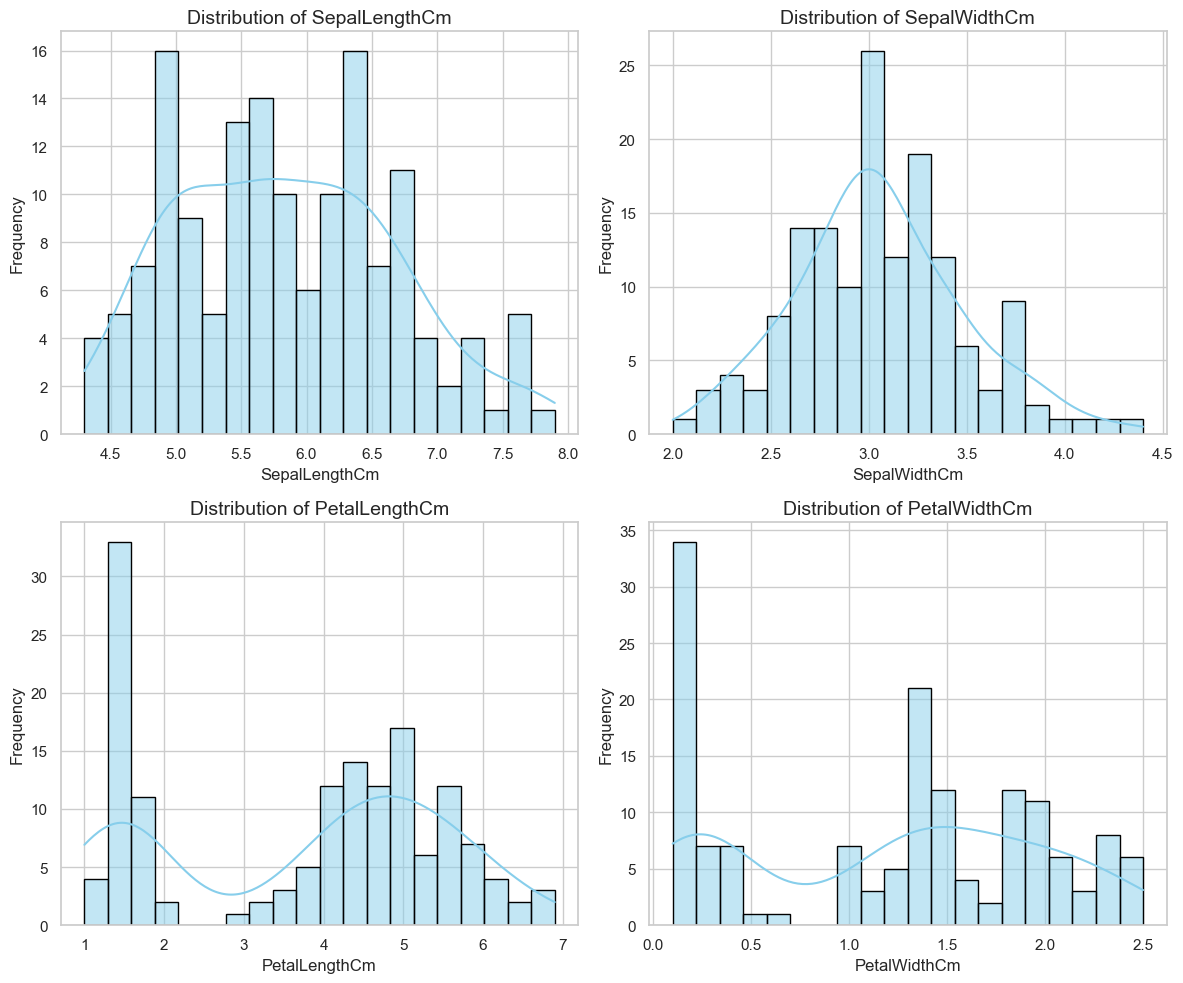

In [19]:
# Visualize the distribution of each feature to understand its shape and identify potential outliers
plt.figure(figsize=(12, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.savefig('Iris_Histograms_Overview.png')  # Save the figure
plt.show()


# Step 7: Histogram by Species

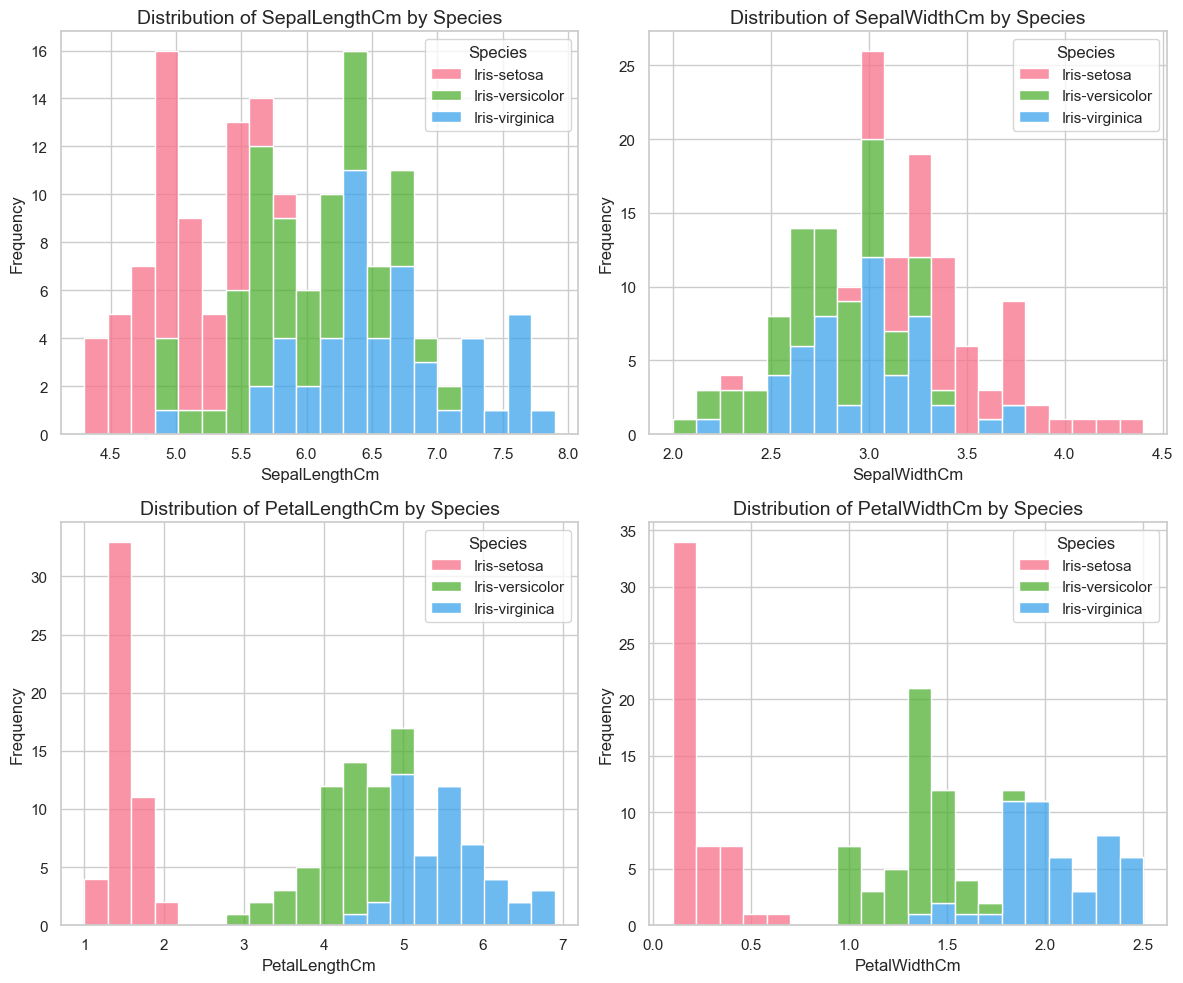

In [20]:
# Create histograms that differentiate species to compare the distributions of features across categories
plt.figure(figsize=(12, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=column, hue='Species', multiple='stack', bins=20, palette=palette)
    plt.title(f'Distribution of {column} by Species', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.savefig('Iris_Histograms_By_Species.png')  # Save the figure
plt.show()


# Step 8: Bar Chart for Species Count

C:\Users\ENGHK\AppData\Local\Temp\ipykernel_7532\1570413341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Species', palette=palette)


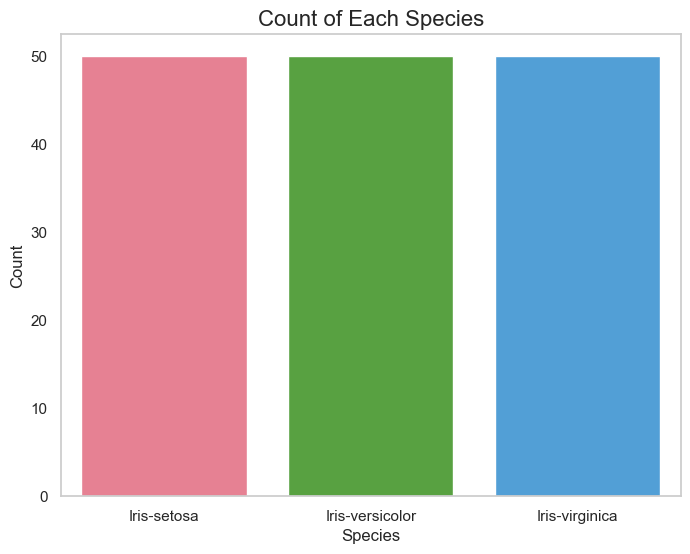

In [21]:
# Count and visualize the number of instances for each species to understand class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Species', palette=palette)
plt.title('Count of Each Species', fontsize=16)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')
plt.savefig('Iris_Species_Count_Bar_Chart.png')
plt.show()


# Step 9: Correlation Matrix

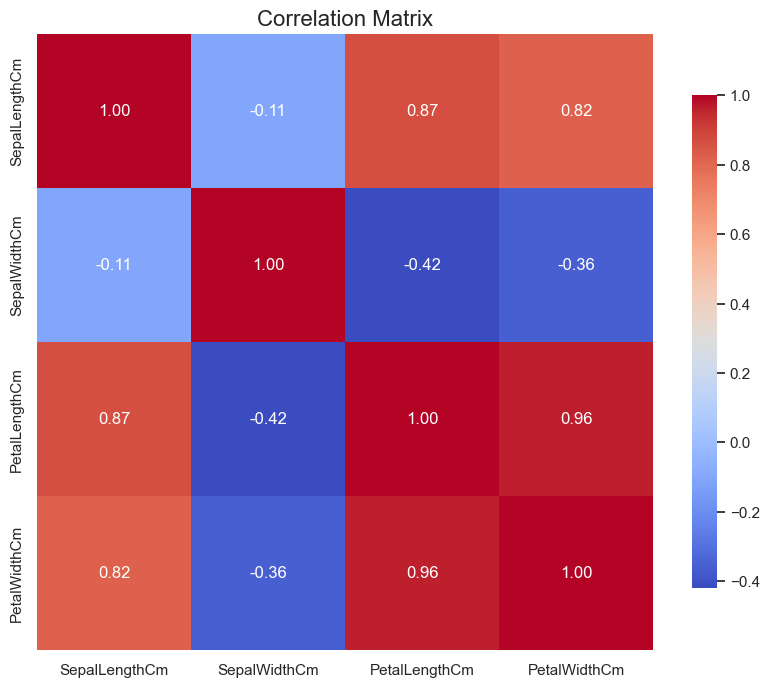

In [22]:
# Calculate and visualize the correlation between numerical features to identify relationships among them
import numpy as np

plt.figure(figsize=(10, 8))
numeric_columns = df.select_dtypes(include=[np.number])
correlation = numeric_columns.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix', fontsize=16)
plt.savefig('Iris_Correlation_Matrix.png')  # Save the figure
plt.show()


# Step 10: Pairplot for Detailed EDA

c:\Users\ENGHK\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


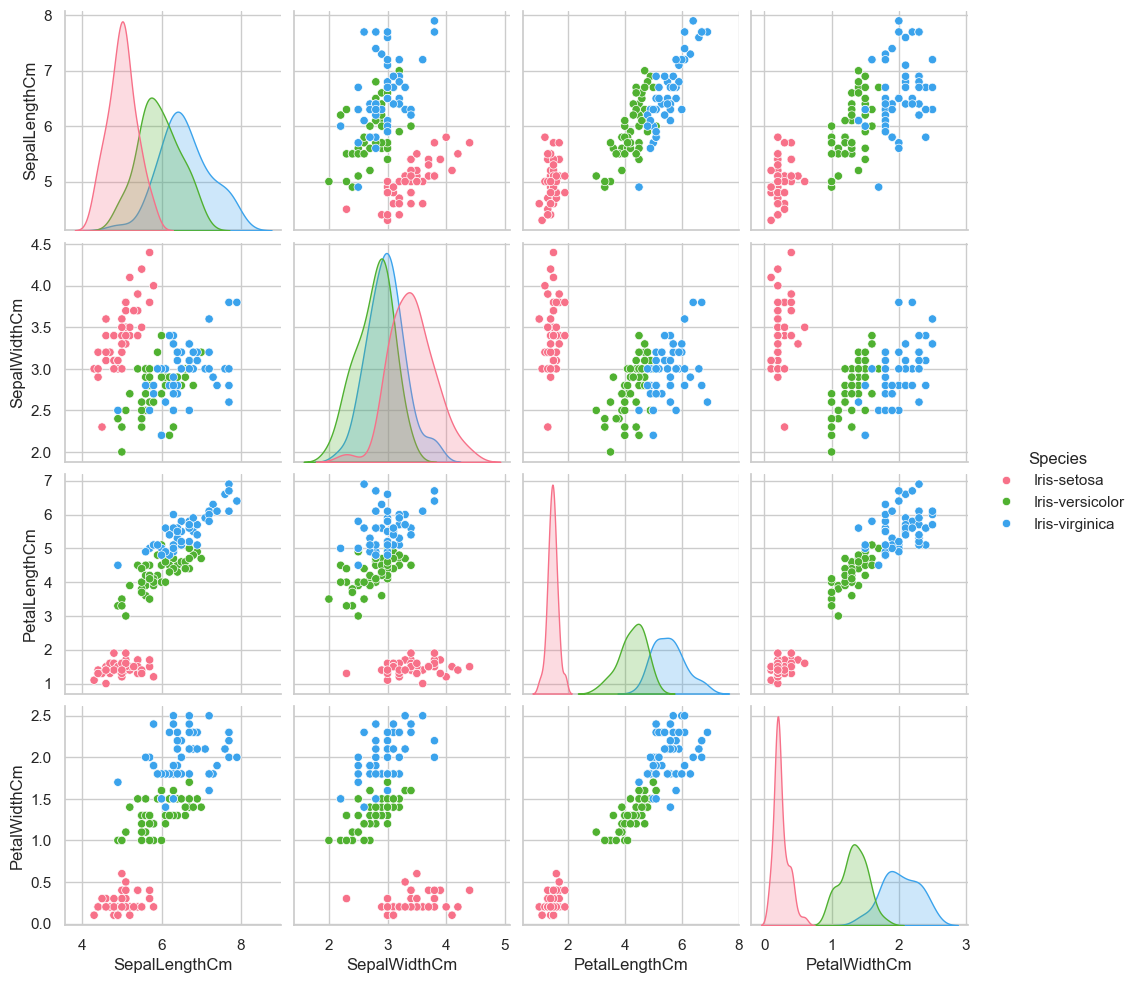

In [23]:
# Generate pairwise plots for features colored by species to explore relationships in a multidimensional space
sns.pairplot(df, hue='Species', palette=palette)
plt.savefig('Iris_Pairplot.png')  # Save the figure
plt.show()


# Step 11: Additional Bar Chart for Average Dimensions by Species

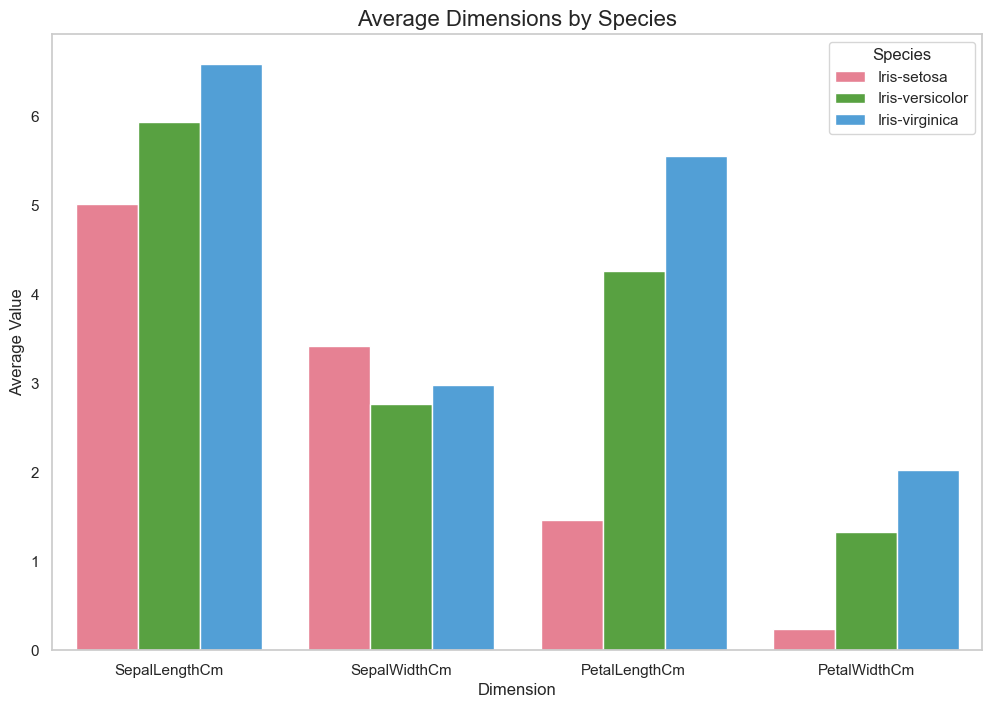

In [24]:
# Calculate and visualize average dimensions by species to compare central tendencies effectively
avg_dimensions = df.groupby('Species')[columns].mean().reset_index()
avg_dimensions = avg_dimensions.melt(id_vars='Species', var_name='Dimension', value_name='Average')
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_dimensions, x='Dimension', y='Average', hue='Species', palette=palette)
plt.title('Average Dimensions by Species', fontsize=16)
plt.xlabel('Dimension', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.grid(axis='y')
plt.savefig('Iris_Average_Dimensions_Bar_Chart.png')
plt.show()
